# Predict the Flat Resale Prices in Singapore 
 
Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy. 
 
In this competition, you are expected to create an analytical and modelling framework to predict the                flat resale prices based on the quantitative and qualitative features provided in the dataset while               answering other questions too cited below. II. The datasets are provided as cited below​: To build the model and tune the model & visualization 
 
i. train1.csv  ii. train2.csv iii. train3.csv iv. building_to_mrt_distance.csv (distance in meters) - Can be used for both train and test 
 
For the test prediction & tool submissions 
 
v. test.csv vi. samplesubmission.csv (just for reference on tool submission format for the test           predictions) 
 
 
Target attribute : ​"resale_price" 

III. Tasks 
Main Task:  
 
In this competition, you are expected to create an analytical and modelling framework to predict the                flat resale prices based on the quantitative and qualitative features provided in the dataset while               answering other questions too cited below.​You may derive new features from the existing features               and from the domain knowledge, which may help in improving the model efficiency. 
 
Visualization Tasks & others: 
1. Exploratory Data Analysis using visualizations in R Notebook or Jupiter notebook format  ​(Train data should be used for this task) ● List down the insights observed from the visualizations ● Explain the impact of most important attributes on target attribute observed from the visualizations. 2. Based on domain and data understanding, which attributes do you intuitively think would impact the flat resale price? Using the ML methods, which attributes do you find as important? 
 
3.  Is there any Bias or variance problem? If yes, how did you address it? 
 
IV. Evaluation Metric:  ● Consider the ‘​RMSE’​ as the error metric for regression task to tune the model. 
 V. For Information: ● Singapore Flats have 99-year lease. 

# Importing all necessary packages

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


#### _In ML there Data pre-processing Steps ._

* Reading CSV
* Check the data shape
* Incorrect data types
* Outliers
* Missing values imputation
* Categorical variables
* Dummification
* Normalisation/Standardisation


### Reading csv file

In [2]:
train1_data= pd.read_csv('train1.csv')
train2_data= pd.read_csv('train2.csv')
train3_data= pd.read_csv('train3.csv')

test_data = pd.read_csv('test.csv')


### Checking number of columns and rows in train and test dataframe

In [3]:
print(train1_data.shape)
print(train2_data.shape)
print(train3_data.shape)
print(test_data.shape)

(52203, 11)
(37153, 12)
(32578, 12)
(21846, 11)


### Check first 5 rows in train and test

In [4]:
train1_data.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004


In [5]:
train2_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,152203
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,152204
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,152205
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,152206
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,152207


In [6]:
train3_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,189356
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,189357
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,189358
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,189359
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,189360


In [7]:
test_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57 years 10 months,221934
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57 years 11 months,221935
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57 years 11 months,221936
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60 years 01 month,221937
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59 years 11 months,221938


In [8]:
print(train1_data.dtypes)

train1_data.columns

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
dtype: object


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'uniqueID'],
      dtype='object')

In [9]:
# In train1 dataset remaining_lease is missing . Singapore lease for 99 years so we need to add that column in train1 data set

train1_data['remaining_lease'] =  train1_data['month'].str[:4].astype('int64') - train1_data['lease_commence_date']
train1_data['remaining_lease'] = 99 -train1_data['remaining_lease']


#  in train 3 and test remaining_lease column need to approximate 
train3_data['remaining_lease'] = train3_data['remaining_lease'].str[:2]


test_data['remaining_lease'] = test_data['remaining_lease'].str[:2]



In [10]:
train2_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,152203
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,152204
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,152205
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,152206
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,152207


In [11]:
train3_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,189356
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,189357
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,189358
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,189359
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,189360


In [12]:
test_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57,221934
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57,221935
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57,221936
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60,221937
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59,221938


In [13]:
# Re- arraging columns in train1 data set so that we can merge train 1 , train 2 , train 3
train1_data = train1_data[['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price','remaining_lease',
       'uniqueID']]
train1_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,uniqueID
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,73,100000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,67,100001
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,67,100002
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,71,100003
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,67,100004


In [14]:
frames = [train1_data, train2_data, train3_data]

In [15]:
train1_data.shape

(52203, 12)

In [16]:
train_data = pd.concat(frames)

In [17]:
train_data.shape

(121934, 12)

In [18]:
# drop unique id as there is no scope 

train_data.describe(include='all')

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
count,121934,121934,121934,121934.000000,121934.000000,121934,121934.0,1.219340e+05,121934,121934,121934,121934.000000
unique,2216,21,7,NaN,NaN,77,101.0,NaN,25,527,26,NaN
top,2,Model A,4 ROOM,NaN,NaN,2018-07,71.0,NaN,04 TO 06,YISHUN RING RD,JURONG WEST,NaN
freq,501,35539,48744,NaN,NaN,2539,4611.0,NaN,27861,2085,9807,NaN
mean,NaN,NaN,NaN,96.998518,1990.887538,NaN,NaN,4.494886e+05,NaN,NaN,NaN,160966.500000
std,NaN,NaN,NaN,24.559239,10.963790,NaN,NaN,1.357230e+05,NaN,NaN,NaN,35199.458199
min,NaN,NaN,NaN,31.000000,1966.000000,NaN,NaN,1.700000e+05,NaN,NaN,NaN,100000.000000
25%,NaN,NaN,NaN,74.000000,1984.000000,NaN,NaN,3.500000e+05,NaN,NaN,NaN,130483.250000
50%,NaN,NaN,NaN,96.000000,1989.000000,NaN,NaN,4.230000e+05,NaN,NaN,NaN,160966.500000
75%,NaN,NaN,NaN,112.000000,2000.000000,NaN,NaN,5.150000e+05,NaN,NaN,NaN,191449.750000


### Data types of each column

In [19]:
# rearraging columns to keep train and test index similar for analysis

train_data = train_data[['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID','resale_price']]


In [20]:
train_data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID,resale_price
32573,2018-07,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,69,221929,538000.0
32574,2018-07,YISHUN,EXECUTIVE,355,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,69,221930,590000.0
32575,2018-07,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,142.0,Apartment,1987,67,221931,620888.0
32576,2018-07,YISHUN,EXECUTIVE,834,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,68,221932,650000.0
32577,2018-07,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,68,221933,770000.0


# Exploratory Data Analysis using visualizations

### Check columns in the data

In [21]:
test_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID'],
      dtype='object')

In [22]:
train_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID', 'resale_price'],
      dtype='object')

### Changind data types of columns

In [23]:
train_numeric = ['remaining_lease']
train_categorical = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range','flat_model']
test_numeric = ['remaining_lease']
test_categorical = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range','flat_model']

In [24]:
for col in train_numeric:
    train_data[col] = train_data[col].astype('int64')

In [25]:
for col in train_categorical:
    train_data[col] = train_data[col].astype('category')

In [26]:
for col in test_numeric:
    test_data[col] = test_data[col].astype('int64')

In [27]:
for col in test_categorical:
    test_data[col] = test_data[col].astype('category')

In [28]:
print(train_data.dtypes)
print(test_data.dtypes)

month                  category
town                   category
flat_type              category
block                  category
street_name            category
storey_range           category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
remaining_lease           int64
uniqueID                  int64
resale_price            float64
dtype: object
month                  category
town                   category
flat_type              category
block                  category
street_name            category
storey_range           category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
remaining_lease           int64
uniqueID                  int64
dtype: object


### Check Summary of the data

In [29]:
print(train_data.describe(include='all'))
print(test_data.describe(include='all'))

          month         town flat_type   block     street_name storey_range  \
count    121934       121934    121934  121934          121934       121934   
unique       77           26         7    2216             527           25   
top     2018-07  JURONG WEST    4 ROOM       2  YISHUN RING RD     04 TO 06   
freq       2539         9807     48744     501            2085        27861   
mean        NaN          NaN       NaN     NaN             NaN          NaN   
std         NaN          NaN       NaN     NaN             NaN          NaN   
min         NaN          NaN       NaN     NaN             NaN          NaN   
25%         NaN          NaN       NaN     NaN             NaN          NaN   
50%         NaN          NaN       NaN     NaN             NaN          NaN   
75%         NaN          NaN       NaN     NaN             NaN          NaN   
max         NaN          NaN       NaN     NaN             NaN          NaN   

        floor_area_sqm flat_model  lease_commence_d

In [30]:
num_attr = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_attr = train_data.select_dtypes(include=['category']).columns

### Missing values

In [31]:
print(train_data.isna().sum())
print(test_data.isna().sum())

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
uniqueID               0
resale_price           0
dtype: int64
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
uniqueID               0
dtype: int64


### Distribution of dependent variable

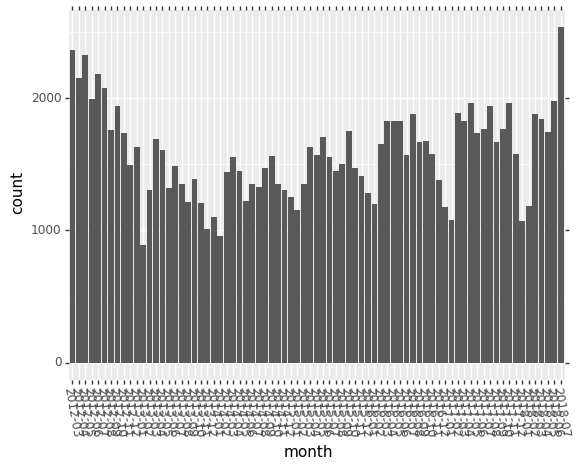

<ggplot: (-9223371897990285466)>

In [32]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

(ggplot(train_data)
 + aes(x='month')
 + geom_bar(size=1000)
 +theme(axis_text_x=element_text(rotation=100000000, hjust=2))

 
)

In [33]:
train_data['year'] =  train_data['month'].str[:4].astype('int64')

In [34]:
test_data['year'] =  test_data['month'].str[:4].astype('int64')

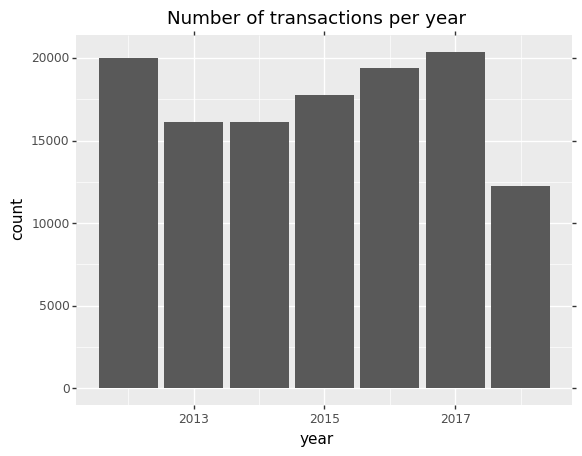

<ggplot: (138864749681)>

In [35]:
(ggplot(train_data)
 + aes(x='year')
 + geom_bar(size=10)
 + ggtitle("Number of transactions per year")
 
)


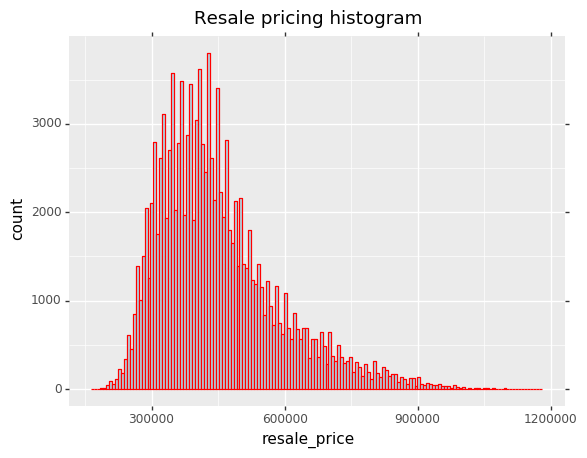

<ggplot: (138865088467)>

In [36]:
ggplot(train_data)+aes(x='resale_price')+geom_histogram(color='red', fill='lightblue') + ggtitle("Resale pricing histogram")

In [37]:
train_data['resale_price'] = np.log(train_data['resale_price'])



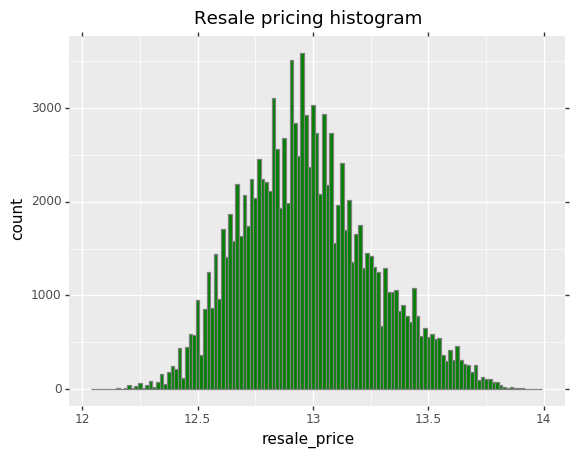

<ggplot: (138865091518)>

In [38]:
ggplot(train_data)+aes(x='resale_price')+geom_histogram(color='grey',fill='green') + ggtitle("Resale pricing histogram")

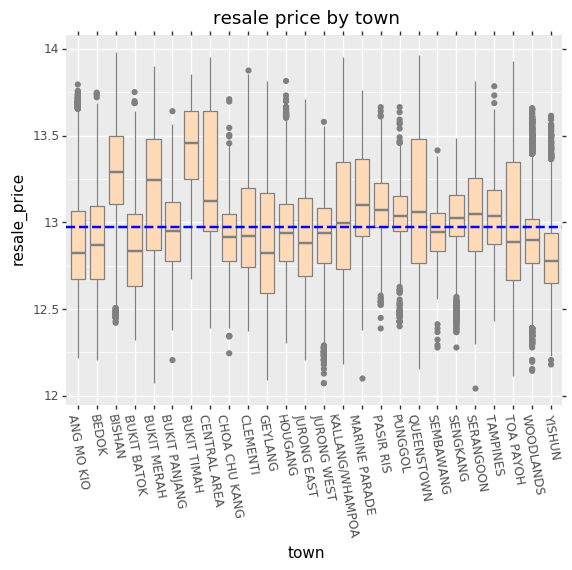

<ggplot: (138863916029)>

In [39]:
a = np.array(train_data['resale_price'])
ggplot(data=train_data)+ aes(x='town', y='resale_price') + geom_boxplot(color='grey',fill='peachpuff')\
+ggtitle('resale price by town')+theme(axis_text_x=element_text(rotation=100000000, hjust=2))\
+geom_hline(aes(yintercept=np.mean(a)),color="blue", linetype="dashed",size=1, alpha = 1)

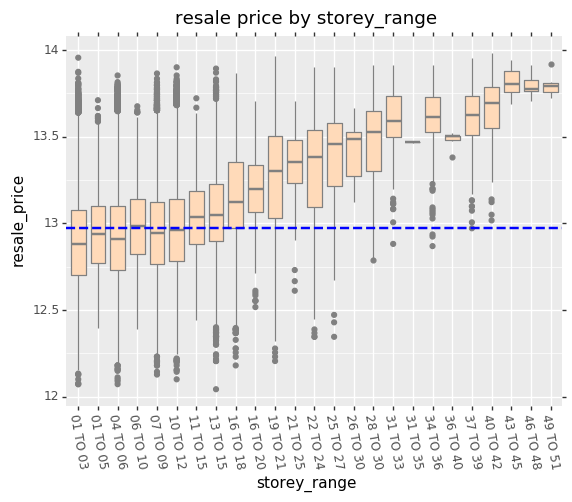

<ggplot: (-9223371897990873095)>

In [40]:
a = np.array(train_data['resale_price'])
ggplot(data=train_data)+ aes(x='storey_range', y='resale_price') + geom_boxplot(color='grey',fill='peachpuff')\
+ggtitle('resale price by storey_range')+theme(axis_text_x=element_text(rotation=100000000, hjust=2))\
+geom_hline(aes(yintercept=np.mean(a)),color="blue", linetype="dashed",size=1, alpha = 1)

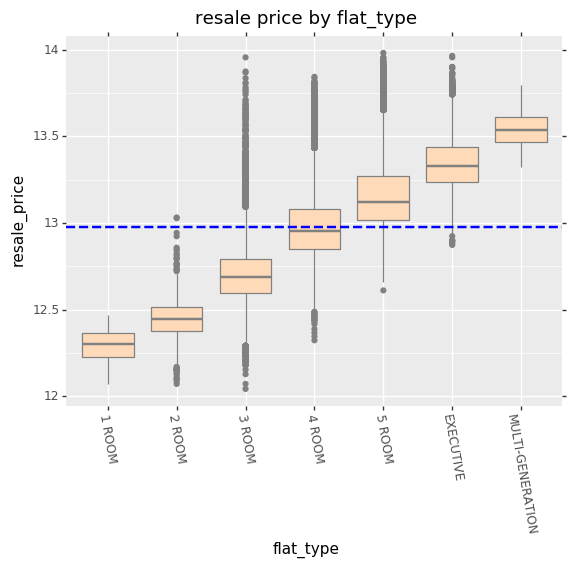

<ggplot: (-9223371897989770033)>

In [41]:
a = np.array(train_data['resale_price'])
ggplot(data=train_data)+ aes(x='flat_type', y='resale_price') + geom_boxplot(color='grey',fill='peachpuff')\
+ggtitle('resale price by flat_type')+theme(axis_text_x=element_text(rotation=100000000, hjust=2))\
+geom_hline(aes(yintercept=np.mean(a)),color="blue", linetype="dashed",size=1, alpha = 1)

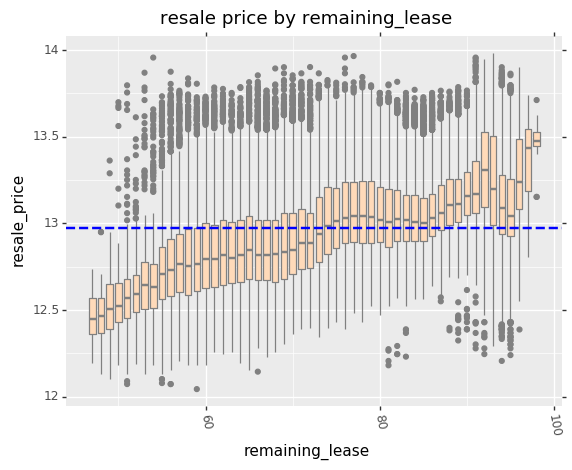

<ggplot: (-9223371897988542022)>

In [42]:
a = np.array(train_data['resale_price'])
ggplot(data=train_data)+ aes(x='remaining_lease', y='resale_price',group='remaining_lease') + geom_boxplot(color='grey',fill='peachpuff')\
+ggtitle('resale price by remaining_lease')+theme(axis_text_x=element_text(rotation=100000000, hjust=2))\
+geom_hline(aes(yintercept=np.mean(a)),color="blue", linetype="dashed",size=1, alpha = 1)

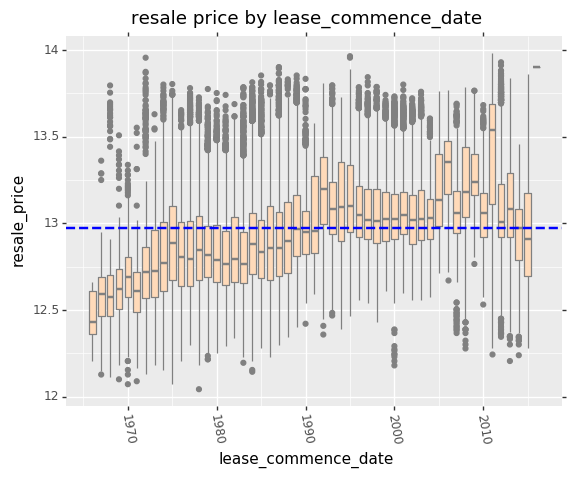

<ggplot: (138869264199)>

In [43]:
a = np.array(train_data['resale_price'])
ggplot(data=train_data)+ aes(x='lease_commence_date', y='resale_price',group='lease_commence_date') + geom_boxplot(color='grey',fill='peachpuff')\
+ggtitle('resale price by lease_commence_date')+theme(axis_text_x=element_text(rotation=100000000, hjust=2))\
+geom_hline(aes(yintercept=np.mean(a)),color="blue", linetype="dashed",size=1, alpha = 1)

### Find correlation in train data set

In [44]:
num_attr

Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'uniqueID',
       'resale_price'],
      dtype='object')

In [45]:
corr = train_data.corr()

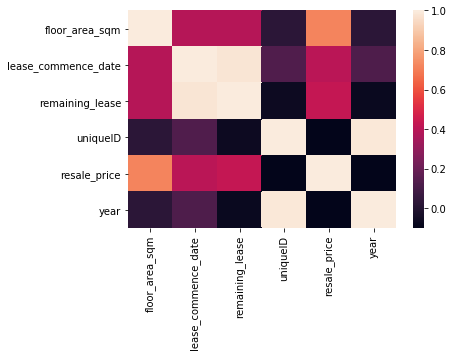

In [46]:
corr = train_data.corr()
sns.heatmap(corr)

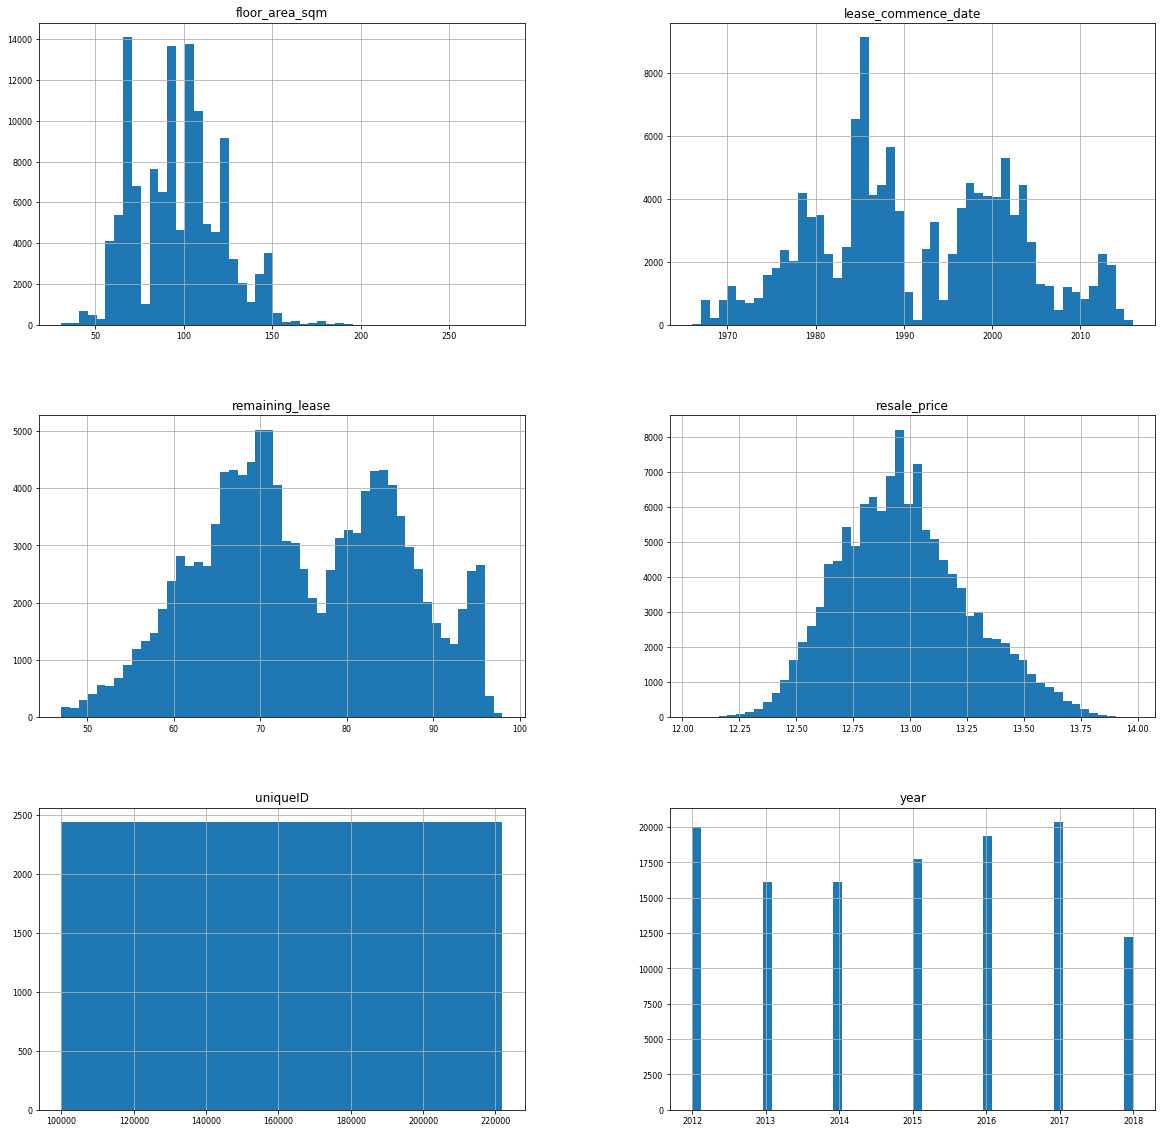

In [47]:
train_data.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Expolatory analysis using above graphs
* Resale pricing on storey-  Higher the storey Range, the higher the median fr resale pricing.
* Important Variables  -town, flat_type, floor area sqm and storey_range
* resale_price is left skewed . So applied log transfomation 
* Most of the outliers for resale pricing fall between 01 to 18 storey_range
* Most of the outliers for resale pricing 3 ,4,5 ,executive  flat type


In [48]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [49]:
label_encode = LabelEncoder()

In [50]:
print(train_data.dtypes)

month                  category
town                   category
flat_type              category
block                  category
street_name            category
storey_range           category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
remaining_lease           int64
uniqueID                  int64
resale_price            float64
year                      int64
dtype: object


In [51]:
train_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID', 'resale_price', 'year'],
      dtype='object')

In [52]:
train_data['town'].unique() 

[ANG MO KIO, BEDOK, BISHAN, BUKIT BATOK, BUKIT MERAH, ..., SERANGOON, TAMPINES, TOA PAYOH, WOODLANDS, YISHUN]
Length: 26
Categories (26, object): [ANG MO KIO, BEDOK, BISHAN, BUKIT BATOK, ..., TAMPINES, TOA PAYOH, WOODLANDS, YISHUN]

In [53]:
train_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID,resale_price,year
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,73,100000,12.429216,2012
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,67,100001,12.487485,2012
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,67,100002,12.660328,2012
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,71,100003,12.676076,2012
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,67,100004,12.679196,2012
5,2012-03,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,68,100005,12.679196,2012
6,2012-03,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,65,100006,12.685408,2012
7,2012-03,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,66,100007,12.691580,2012
8,2012-03,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,66,100008,12.700769,2012
9,2012-03,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985,72,100009,12.706848,2012


In [54]:
label_encoder = preprocessing.LabelEncoder() 

In [55]:
train_data['town']= label_encoder.fit_transform(train_data['town']) 
train_data['flat_type']= label_encoder.fit_transform(train_data['flat_type']) 
train_data['block']= label_encoder.fit_transform(train_data['block']) 
train_data['street_name']= label_encoder.fit_transform(train_data['street_name']) 
train_data['storey_range']= label_encoder.fit_transform(train_data['storey_range']) 
train_data['flat_model']= label_encoder.fit_transform(train_data['flat_model']) 

In [56]:
train_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID,resale_price,year
0,2012-03,0,1,226,13,3,45.0,4,1986,73,100000,12.429216,2012
1,2012-03,0,1,1268,16,1,44.0,4,1980,67,100001,12.487485,2012
2,2012-03,0,2,1420,13,3,68.0,11,1980,67,100002,12.660328,2012
3,2012-03,0,2,1128,10,1,67.0,11,1984,71,100003,12.676076,2012
4,2012-03,0,2,1410,14,3,67.0,11,1980,67,100004,12.679196,2012


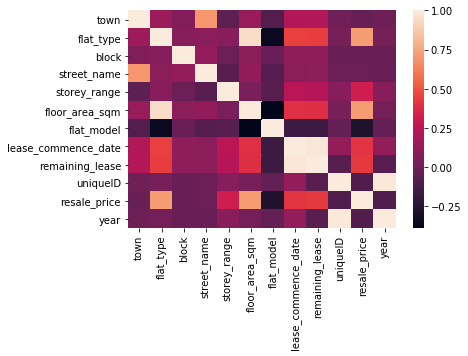

In [57]:
corr = train_data.corr()
sns.heatmap(corr)

In [58]:
test_data['town']= label_encoder.fit_transform(test_data['town']) 
test_data['flat_type']= label_encoder.fit_transform(test_data['flat_type']) 
test_data['block']= label_encoder.fit_transform(test_data['block']) 
test_data['street_name']= label_encoder.fit_transform(test_data['street_name']) 
test_data['storey_range']= label_encoder.fit_transform(test_data['storey_range']) 
test_data['flat_model']= label_encoder.fit_transform(test_data['flat_model']) 

In [59]:
train_data['resale_price'] = train_data['resale_price'].astype('float64')

In [60]:
test_data_backup = pd.DataFrame(test_data)

In [61]:
train_data.drop('month',axis=1,inplace=True)

In [62]:
test_data.drop('month',axis=1,inplace=True)

In [63]:
X = train_data.loc[:, train_data.columns != 'resale_price']
y = train_data.loc[:, train_data.columns == 'resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_data.shape)

(97547, 11)
(24387, 11)
(97547, 1)
(24387, 1)
(21846, 11)


In [65]:
num_attr = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_attr = X_train.select_dtypes(include=['category']).columns

In [66]:
X_train.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID', 'year'],
      dtype='object')

In [67]:
X_test.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID,year
51787,20,3,600,142,7,90.0,12,2009,94,151787,2014
4884,4,2,134,213,1,59.0,4,1975,62,104884,2012
47894,25,2,448,513,2,67.0,11,1985,70,147894,2014
33759,20,4,714,5,7,111.0,4,2001,83,185962,2016
47631,22,3,628,415,2,102.0,7,1984,69,147631,2014


### Linear Regression Model 1

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
test_pred_lr=regression_model.predict(X_test)
train_pred_lr=regression_model.predict(X_train)

rmse = mean_squared_error(y_test, test_pred_lr)
r2 = r2_score(y_test, test_pred_lr)
rmse_train = mean_squared_error(y_train, train_pred_lr)
r2_train = r2_score(y_train, train_pred_lr)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Root mean squared error Tain: ', rmse_train)
print('R2 scoreTrain : ', r2_train)

Slope: [[-5.52557262e-03  6.58421194e-02 -3.61024533e-05  7.44139268e-05
   2.54445342e-02  5.67981043e-03  7.70033229e-04 -5.13434170e-03
   8.08239648e-03  2.11111187e-07 -1.73960403e-02]]
Intercept: [56.84649363]
Root mean squared error:  0.0276183603830758
R2 score:  0.6572740927341743
Root mean squared error Tain:  0.027780616320069736
R2 scoreTrain :  0.655298176085019


In [70]:
test_actual_lr=regression_model.predict(test_data)


In [71]:
final_test_pred_lr = pd.DataFrame(test_actual_lr)


In [72]:
final_test_pred_lr = np.expm1(final_test_pred_lr)

In [73]:
final_test_pred_lr.shape

(21846, 1)

In [74]:
final_test_pred_lr = np.expm1(final_test_pred_lr)

In [75]:
#final_test_pred_lr.to_csv(r'linear_regression.csv', index=False) 

In [76]:
# town, flat_type, floor area sqm and storey_range

### Linear Regression Model 2

In [77]:
X = train_data.loc[:, ['town', 'flat_type', 'floor_area_sqm','storey_range']]
y = train_data.loc[:, train_data.columns == 'resale_price']
test_data=test_data.loc[:, ['town', 'flat_type', 'floor_area_sqm','storey_range']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_data.shape)

(97547, 4)
(24387, 4)
(97547, 1)
(24387, 1)
(21846, 4)


In [79]:
num_attr = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_attr = X_train.select_dtypes(include=['category']).columns

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_attr])
X_train[num_attr] = scaler.transform(X_train[num_attr])
X_test[num_attr] = scaler.transform(X_test[num_attr])
test_data[num_attr] = scaler.transform(test_data[num_attr])

In [81]:
X_train.shape

(97547, 4)

In [82]:
X_test.shape

(24387, 4)

### Linear Regression Model 2

In [83]:
regression_model.fit(X_train, y_train)
test_pred_lr=regression_model.predict(X_test)
train_pred_lr=regression_model.predict(X_train)

rmse = mean_squared_error(y_test, test_pred_lr)
r2 = r2_score(y_test, test_pred_lr)
rmse_train = mean_squared_error(y_train, train_pred_lr)
r2_train = r2_score(y_train, train_pred_lr)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Root mean squared error Tain: ', rmse_train)
print('R2 scoreTrain : ', r2_train)

Slope: [[-0.00397622  0.08466243  0.13076885  0.02636895]]
Intercept: [12.67023156]
Root mean squared error:  0.030323238307503837
R2 score:  0.6237083151921816
Root mean squared error Tain:  0.03059759962462478
R2 scoreTrain :  0.6203450536693482


In [84]:
test_actual_lr=regression_model.predict(test_data)
final_test_pred_lr = pd.DataFrame(test_actual_lr)
final_test_pred_lr = np.expm1(final_test_pred_lr)


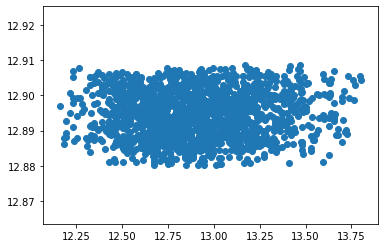

In [118]:
plt.scatter(y_test,test_pred_lr)

In [85]:
final_test_pred_lr.to_csv(r'linear_regression2.csv', index=False) 

### Support Vector Machine

In [86]:
from sklearn.svm import SVR
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)   


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
test_pred_lr=clf.predict(X_test)
train_pred_lr=clf.predict(X_train)

rmse = mean_squared_error(y_test, test_pred_lr)
r2 = r2_score(y_test, test_pred_lr)
rmse_train = mean_squared_error(y_train, train_pred_lr)
r2_train = r2_score(y_train, train_pred_lr)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Root mean squared error Tain: ', rmse_train)
print('R2 scoreTrain : ', r2_train)

Slope: [[-0.00397622  0.08466243  0.13076885  0.02636895]]
Intercept: [12.67023156]
Root mean squared error:  0.02640442422531894
R2 score:  0.6723382516943477
Root mean squared error Tain:  0.026853500265704034
R2 scoreTrain :  0.6668018299722742


In [88]:
test_actual_lr=regression_model.predict(test_data)
final_test_pred_lr = pd.DataFrame(test_actual_lr)
final_test_pred_lr = np.expm1(final_test_pred_lr)

In [89]:
final_test_pred_lr.to_csv(r'svr.csv', index=False) 

### Removing Outliers

In [90]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

town                      14.000000
flat_type                  2.000000
block                   1032.000000
street_name              290.750000
storey_range               3.000000
floor_area_sqm            38.000000
flat_model                 7.000000
lease_commence_date       16.000000
remaining_lease           17.000000
uniqueID               60966.500000
resale_price               0.386234
year                       4.000000
dtype: float64


In [103]:
train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]
train_data.shape

(8704, 12)

### Linear Regression Model 3

In [109]:
X = train_data.loc[:, train_data.columns != 'resale_price']
y = train_data.loc[:, train_data.columns == 'resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)

In [110]:
regression_model.fit(X_train, y_train)
test_pred_lr=regression_model.predict(X_test)
train_pred_lr=regression_model.predict(X_train)

rmse = mean_squared_error(y_test, test_pred_lr)
r2 = r2_score(y_test, test_pred_lr)
rmse_train = mean_squared_error(y_train, train_pred_lr)
r2_train = r2_score(y_train, train_pred_lr)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Root mean squared error Tain: ', rmse_train)
print('R2 scoreTrain : ', r2_train)

Slope: [[-6.99625151e-03  5.97809189e-02 -4.96903955e-05  1.14202982e-04
   1.59853153e-02  6.90073623e-03 -4.45415867e-04  1.31798067e-02
  -9.11274587e-03 -1.55970203e-06  0.00000000e+00]]
Intercept: [-13.14290796]
Root mean squared error:  0.03572643499385948
R2 score:  0.6342867319675498
Root mean squared error Tain:  0.03537273422495904
R2 scoreTrain :  0.6216270204741361


### SVM Model 2

In [111]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)  
test_pred_lr=clf.predict(X_test)
train_pred_lr=clf.predict(X_train)

rmse = mean_squared_error(y_test, test_pred_lr)
r2 = r2_score(y_test, test_pred_lr)
rmse_train = mean_squared_error(y_train, train_pred_lr)
r2_train = r2_score(y_train, train_pred_lr)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Root mean squared error Tain: ', rmse_train)
print('R2 scoreTrain : ', r2_train)

Slope: [[-6.99625151e-03  5.97809189e-02 -4.96903955e-05  1.14202982e-04
   1.59853153e-02  6.90073623e-03 -4.45415867e-04  1.31798067e-02
  -9.11274587e-03 -1.55970203e-06  0.00000000e+00]]
Intercept: [-13.14290796]
Root mean squared error:  0.09770950324120782
R2 score:  -0.00020228030899671623
Root mean squared error Tain:  0.09358972663623845
R2 scoreTrain :  -0.0011050741838900535


In [114]:
test_data_backup.drop('month',axis=1,inplace=True)

In [115]:
test_actual_lr=regression_model.predict(test_data_backup)
final_test_pred_lr = pd.DataFrame(test_actual_lr)
final_test_pred_lr = np.expm1(final_test_pred_lr)

In [116]:
final_test_pred_lr.to_csv(r'svr2.csv', index=False) 